# Trabajo Integrador
#### Nombre: María Paz Romo

## Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# from matplotlib import style
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
sns.set()
import warnings;
warnings.filterwarnings('ignore')

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Carga Base de datos

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Análisis Exploratorio

In [3]:
#data.isnull().sum()
data.describe().round()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.0,167484.0,2.0,2.0,2.0,35.0,-0.0,-0.0,-0.0,-0.0,...,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0,0.0
std,8660.0,129748.0,0.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,...,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0,0.0
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,...,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7501.0,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,...,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0,0.0
50%,15000.0,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22500.0,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,...,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


### Variables:
- ID: identificacodor del cliente.
- LIMIT_BAL: monto de crédito otorgado en dolares.
1
- SEX: genero (1=male, 2=female)
- EDUCATION: educación (1=graduate school, 2=university, 3=high school,
4=others, 5=unknown, 6=unknown)
- MARRIAGE: estado civi (1=married, 2=single, 3=others)
- AGE: edad en años
- PAY_0: estado de pago a septiembre 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight months,
9=payment delay for nine months and above)
- PAY_2: estado de pago a agosto 2005
- PAY_3: estado de pago a julio 2005
- PAY_4: estado de pago a junio 2005
- PAY_5: estado de pago a mayo 2005
- PAY_6: estado de pago a abril 2005
- BILL_AMT1: monto del estado de cuenta a septiembre 2005 en dólares
- BILL_AMT2: monto del estado de cuenta a agosto 2005 en dólares
- BILL_AMT3: monto del estado de cuenta a julio 2005 en dólares
- BILL_AMT4: monto del estado de cuenta a junio 2005 en dólares
- BILL_AMT5: monto del estado de cuenta a mayo 2005 en dólares
- BILL_AMT6: monto del estado de cuenta a abril 2005 en dólares
- PAY_AMT1: importe del pago anterior en septiembre 2005 en dólares
- PAY_AMT2: importe del pago anterior en agosto 2005 en dólares
- PAY_AMT3: importe del pago anterior en julio 2005 en dólares
- PAY_AMT4: importe del pago anterior en junio 2005 en dólares
- PAY_AMT5: importe del pago anterior en mayo 2005 en dólares
- PAY_AMT6: importe del pago anterior en abril 2005 en dólares
- default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Todas las varibles son cuantitativas, por lo que no requiere transformación de variables dummy

In [5]:
data.sum().isnull()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

No hay datos nulos

In [6]:
data = data.set_index('ID')

Se fija la columna "ID" como indice

* Varible 'LIMIT_BAL'

In [7]:
data['LIMIT_BAL'].value_counts().sort_index()

10000.0       493
16000.0         2
20000.0      1976
30000.0      1610
40000.0       230
             ... 
750000.0        4
760000.0        1
780000.0        2
800000.0        2
1000000.0       1
Name: LIMIT_BAL, Length: 81, dtype: int64

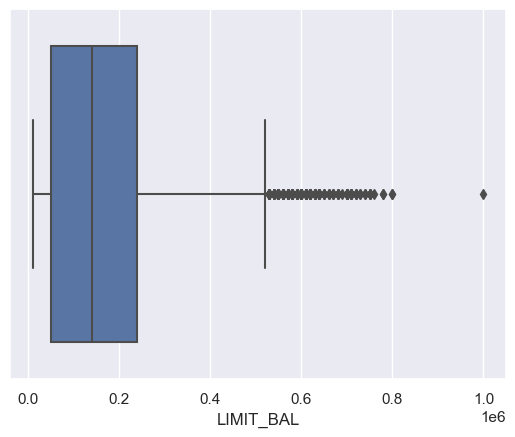

In [8]:
# Boxplot for 'duration'
g = sns.boxplot(x=data["LIMIT_BAL"])

La mayor concentración de los datos se encuentra entre 0 y 600000 dolares, encontramos valores sobre este rango los que podriamos considerar como datos atipicos

In [9]:
# 1=male, 2=female

print(f"Cantidad clientes por genero: {data['SEX'].value_counts().sort_index()}, % clientes por genero: {data['SEX'].value_counts(normalize=True).sort_index()}")

Cantidad clientes por genero: 1    11888
2    18112
Name: SEX, dtype: int64, % clientes por genero: 1    0.396267
2    0.603733
Name: SEX, dtype: float64


<AxesSubplot:xlabel='SEX', ylabel='count'>

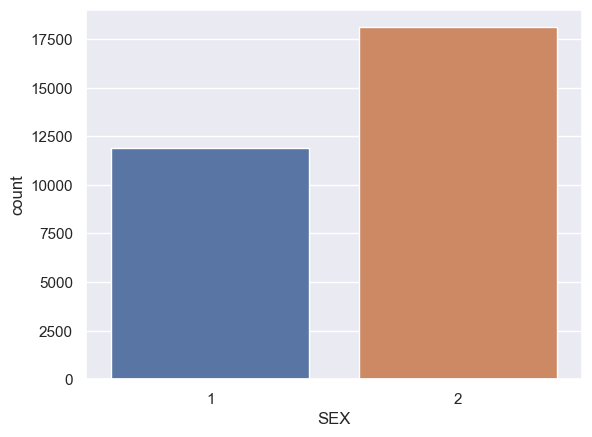

In [10]:
sns.countplot(x=data['SEX'])

In [11]:
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

data['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

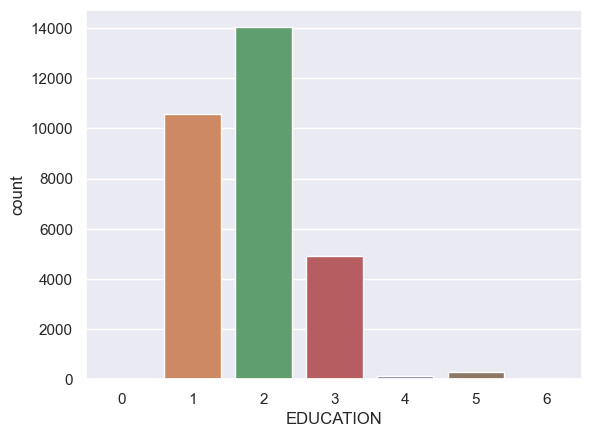

In [12]:
sns.countplot(x=data["EDUCATION"])
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

In [13]:
data['EDUCATION']=data['EDUCATION'].replace([0, 6], 5)

Se reemplazan los valores 0 y 6 por 5=unknown para agruparlos, ya que 5 tiene la misma descripción que 6 y 0 no aparece entonces lo dejamos como "unknown" 

In [14]:
# 1=married, 2=single, 3=others

data['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

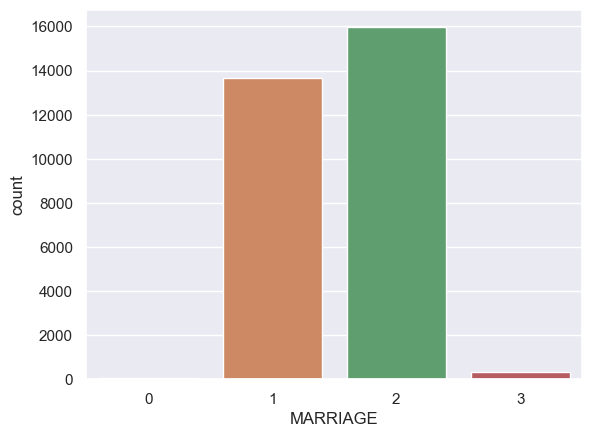

In [15]:
sns.countplot(x=data["MARRIAGE"])
# 1=married, 2=single, 3=others

Se reemplaza el valor 0 por 3=others para agruparlos, ya que 0 no se encuentra dentro de la descripción dada.

In [16]:
data['MARRIAGE']=data['MARRIAGE'].replace([0], 3)

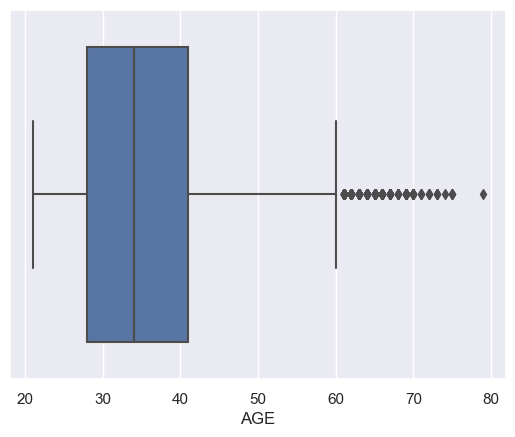

In [17]:
g = sns.boxplot(x=data["AGE"])

La mayor cantidad del clientes se encuentra entre los 20 y 60 años, existen clientes con edad sobre este rango pero podrian ser considerados datos atipicos.

In [18]:
data['PAY_0'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_0, dtype: int64

In [19]:
data['PAY_2'].value_counts().sort_index()

-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: PAY_2, dtype: int64

In [20]:
data['PAY_3'].value_counts().sort_index()

-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: PAY_3, dtype: int64

In [21]:
data['PAY_4'].value_counts().sort_index()

-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: PAY_4, dtype: int64

In [22]:
data['PAY_5'].value_counts().sort_index()

-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: PAY_5, dtype: int64

In [23]:
data['PAY_6'].value_counts().sort_index()

-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: PAY_6, dtype: int64

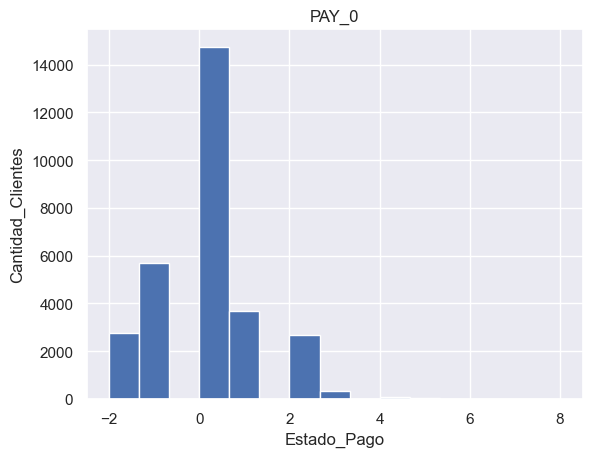

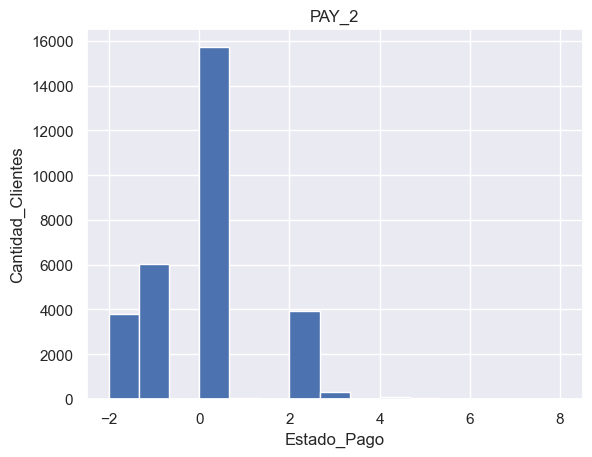

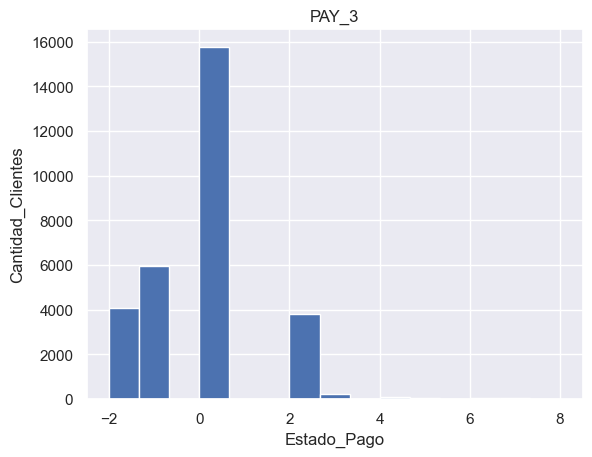

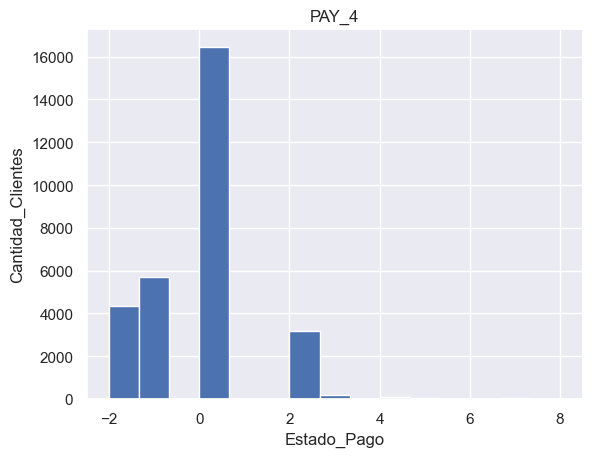

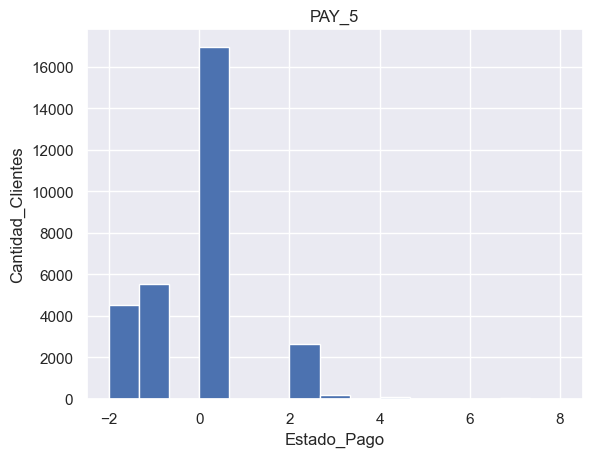

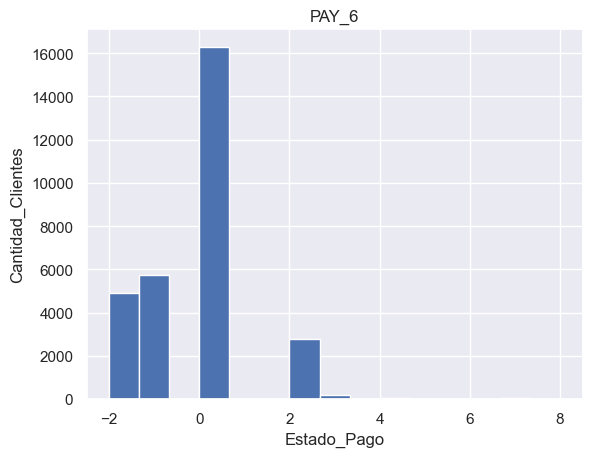

In [24]:
pay = ['PAY_0',
       'PAY_2',
       'PAY_3',
       'PAY_4',
       'PAY_5',
       'PAY_6',]
for columns in pay:
    plt.hist(data[columns], bins=15)
    plt.title(columns) , plt.xlabel("Estado_Pago"), plt.ylabel("Cantidad_Clientes")
    plt.show()

Entre abril y septiembre de 2005 cerca del 50% de los clientes se encuentran con pago al día.

In [25]:
data['BILL_AMT1'].value_counts()

0.0         2008
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
11636.0        1
146034.0       1
20817.0        1
1351.0         1
47929.0        1
Name: BILL_AMT1, Length: 22723, dtype: int64

Text(0.5, 1.0, 'BILL_AMT1')

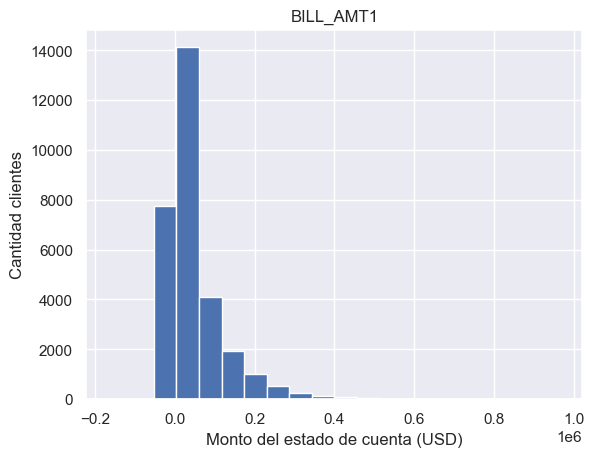

In [26]:
plt.hist(data["BILL_AMT1"], bins=20)
plt.xlabel('Monto del estado de cuenta (USD)')
plt.ylabel('Cantidad clientes')
plt.title('BILL_AMT1')

In [27]:
data['BILL_AMT2'].value_counts()

0.0        2506
390.0       231
326.0        75
780.0        75
316.0        72
           ... 
26357.0       1
85195.0       1
6889.0        1
11004.0       1
48905.0       1
Name: BILL_AMT2, Length: 22346, dtype: int64

Text(0.5, 1.0, 'BILL_AMT2')

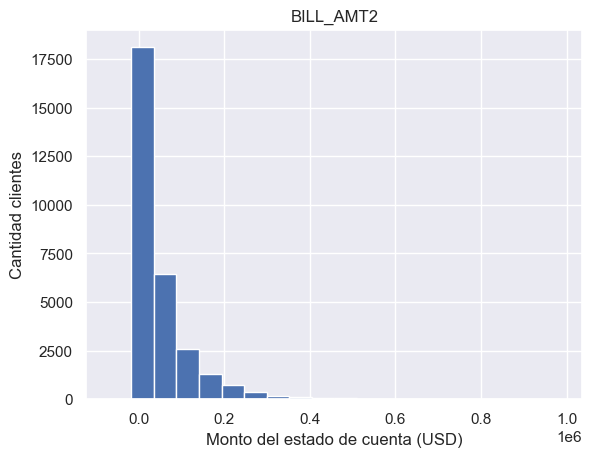

In [28]:
plt.hist(data["BILL_AMT2"], bins=20)
plt.xlabel('Monto del estado de cuenta (USD)')
plt.ylabel('Cantidad clientes')
plt.title('BILL_AMT2')

In [29]:
data['BILL_AMT3'].value_counts()

0.0         2870
390.0        275
780.0         74
326.0         63
316.0         62
            ... 
19580.0        1
45129.0        1
227807.0       1
39330.0        1
49764.0        1
Name: BILL_AMT3, Length: 22026, dtype: int64

Text(0.5, 1.0, 'BILL_AMT3')

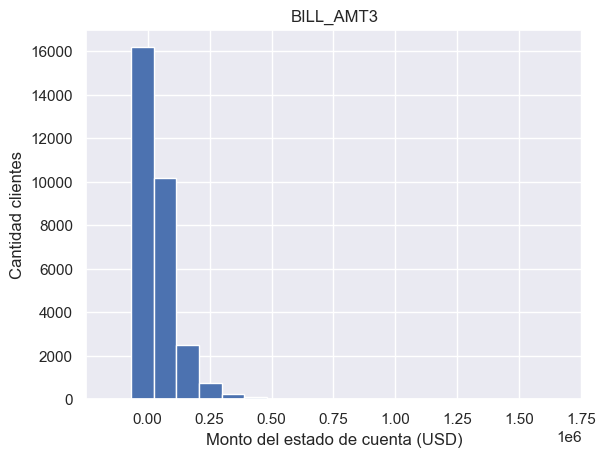

In [30]:
plt.hist(data["BILL_AMT3"], bins=20)
plt.xlabel('Monto del estado de cuenta (USD)')
plt.ylabel('Cantidad clientes')
plt.title('BILL_AMT3')

In [31]:
data['BILL_AMT4'].value_counts()

0.0         3195
390.0        246
780.0        101
316.0         68
326.0         62
            ... 
97189.0        1
118839.0       1
23567.0        1
18377.0        1
36535.0        1
Name: BILL_AMT4, Length: 21548, dtype: int64

Text(0.5, 1.0, 'BILL_AMT4')

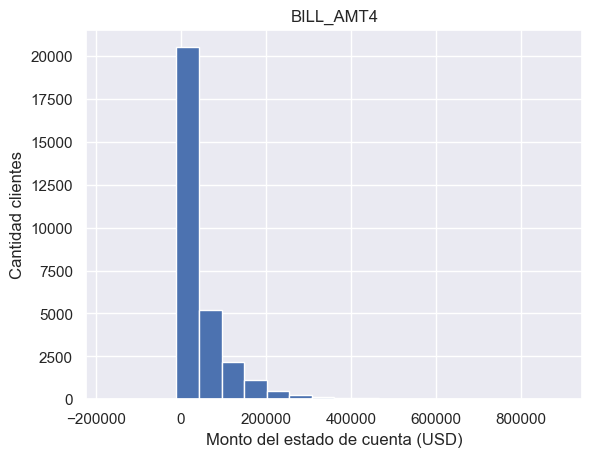

In [32]:
plt.hist(data["BILL_AMT4"], bins=20)
plt.xlabel('Monto del estado de cuenta (USD)')
plt.ylabel('Cantidad clientes')
plt.title('BILL_AMT4')

In [33]:
data['BILL_AMT5'].value_counts()

0.0        3506
390.0       235
780.0        94
316.0        79
326.0        62
           ... 
19341.0       1
66726.0       1
80682.0       1
28508.0       1
32428.0       1
Name: BILL_AMT5, Length: 21010, dtype: int64

Text(0.5, 1.0, 'BILL_AMT5')

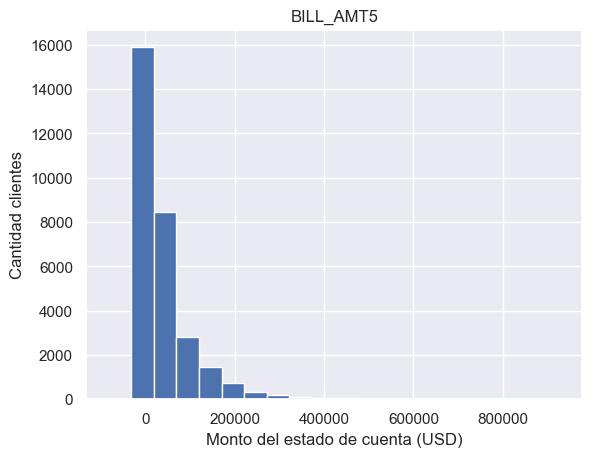

In [34]:
plt.hist(data["BILL_AMT5"], bins=20)
plt.xlabel('Monto del estado de cuenta (USD)')
plt.ylabel('Cantidad clientes')
plt.title('BILL_AMT5')

In [35]:
data['BILL_AMT6'].value_counts()

0.0         4020
390.0        207
780.0         86
150.0         78
316.0         77
            ... 
26852.0        1
108660.0       1
480.0          1
15298.0        1
15313.0        1
Name: BILL_AMT6, Length: 20604, dtype: int64

Text(0.5, 1.0, 'BILL_AMT6')

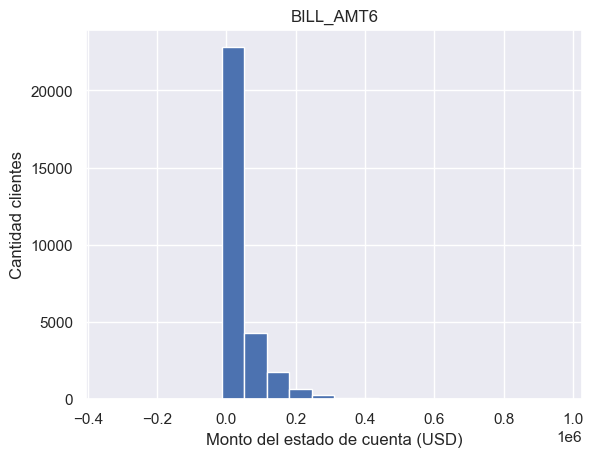

In [36]:
plt.hist(data["BILL_AMT6"], bins=20)
plt.xlabel('Monto del estado de cuenta (USD)')
plt.ylabel('Cantidad clientes')
plt.title('BILL_AMT6')

In [37]:
data['PAY_AMT1'].value_counts().sort_index()

0.0         5249
1.0            9
2.0           14
3.0           15
4.0           18
            ... 
405016.0       1
423903.0       1
493358.0       1
505000.0       1
873552.0       1
Name: PAY_AMT1, Length: 7943, dtype: int64

In [38]:
data['PAY_AMT2'].value_counts().sort_index()

0.0          5396
1.0            15
2.0            20
3.0            18
4.0            11
             ... 
580464.0        1
1024516.0       1
1215471.0       1
1227082.0       1
1684259.0       1
Name: PAY_AMT2, Length: 7899, dtype: int64

In [39]:
data['PAY_AMT3'].value_counts().sort_index()

0.0         5968
1.0           13
2.0           19
3.0           14
4.0           15
            ... 
400972.0       1
417588.0       1
508229.0       1
889043.0       1
896040.0       1
Name: PAY_AMT3, Length: 7518, dtype: int64

In [40]:
data['PAY_AMT4'].value_counts().sort_index()

0.0         6408
1.0           22
2.0           22
3.0           13
4.0           20
            ... 
400046.0       1
432130.0       1
497000.0       1
528897.0       1
621000.0       1
Name: PAY_AMT4, Length: 6937, dtype: int64

In [41]:
data['PAY_AMT5'].value_counts().sort_index()

0.0         6703
1.0           21
2.0           13
3.0           13
4.0           12
            ... 
332000.0       1
379267.0       1
388071.0       1
417990.0       1
426529.0       1
Name: PAY_AMT5, Length: 6897, dtype: int64

In [42]:
data['PAY_AMT6'].value_counts().sort_index()

0.0         7173
1.0           20
2.0            9
3.0           14
4.0           12
            ... 
403500.0       1
422000.0       1
443001.0       1
527143.0       1
528666.0       1
Name: PAY_AMT6, Length: 6939, dtype: int64

In [43]:
PAY_AMT=data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
PAY_AMT.describe().round()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0
std,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1000.0,833.0,390.0,296.0,252.0,118.0
50%,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0
max,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


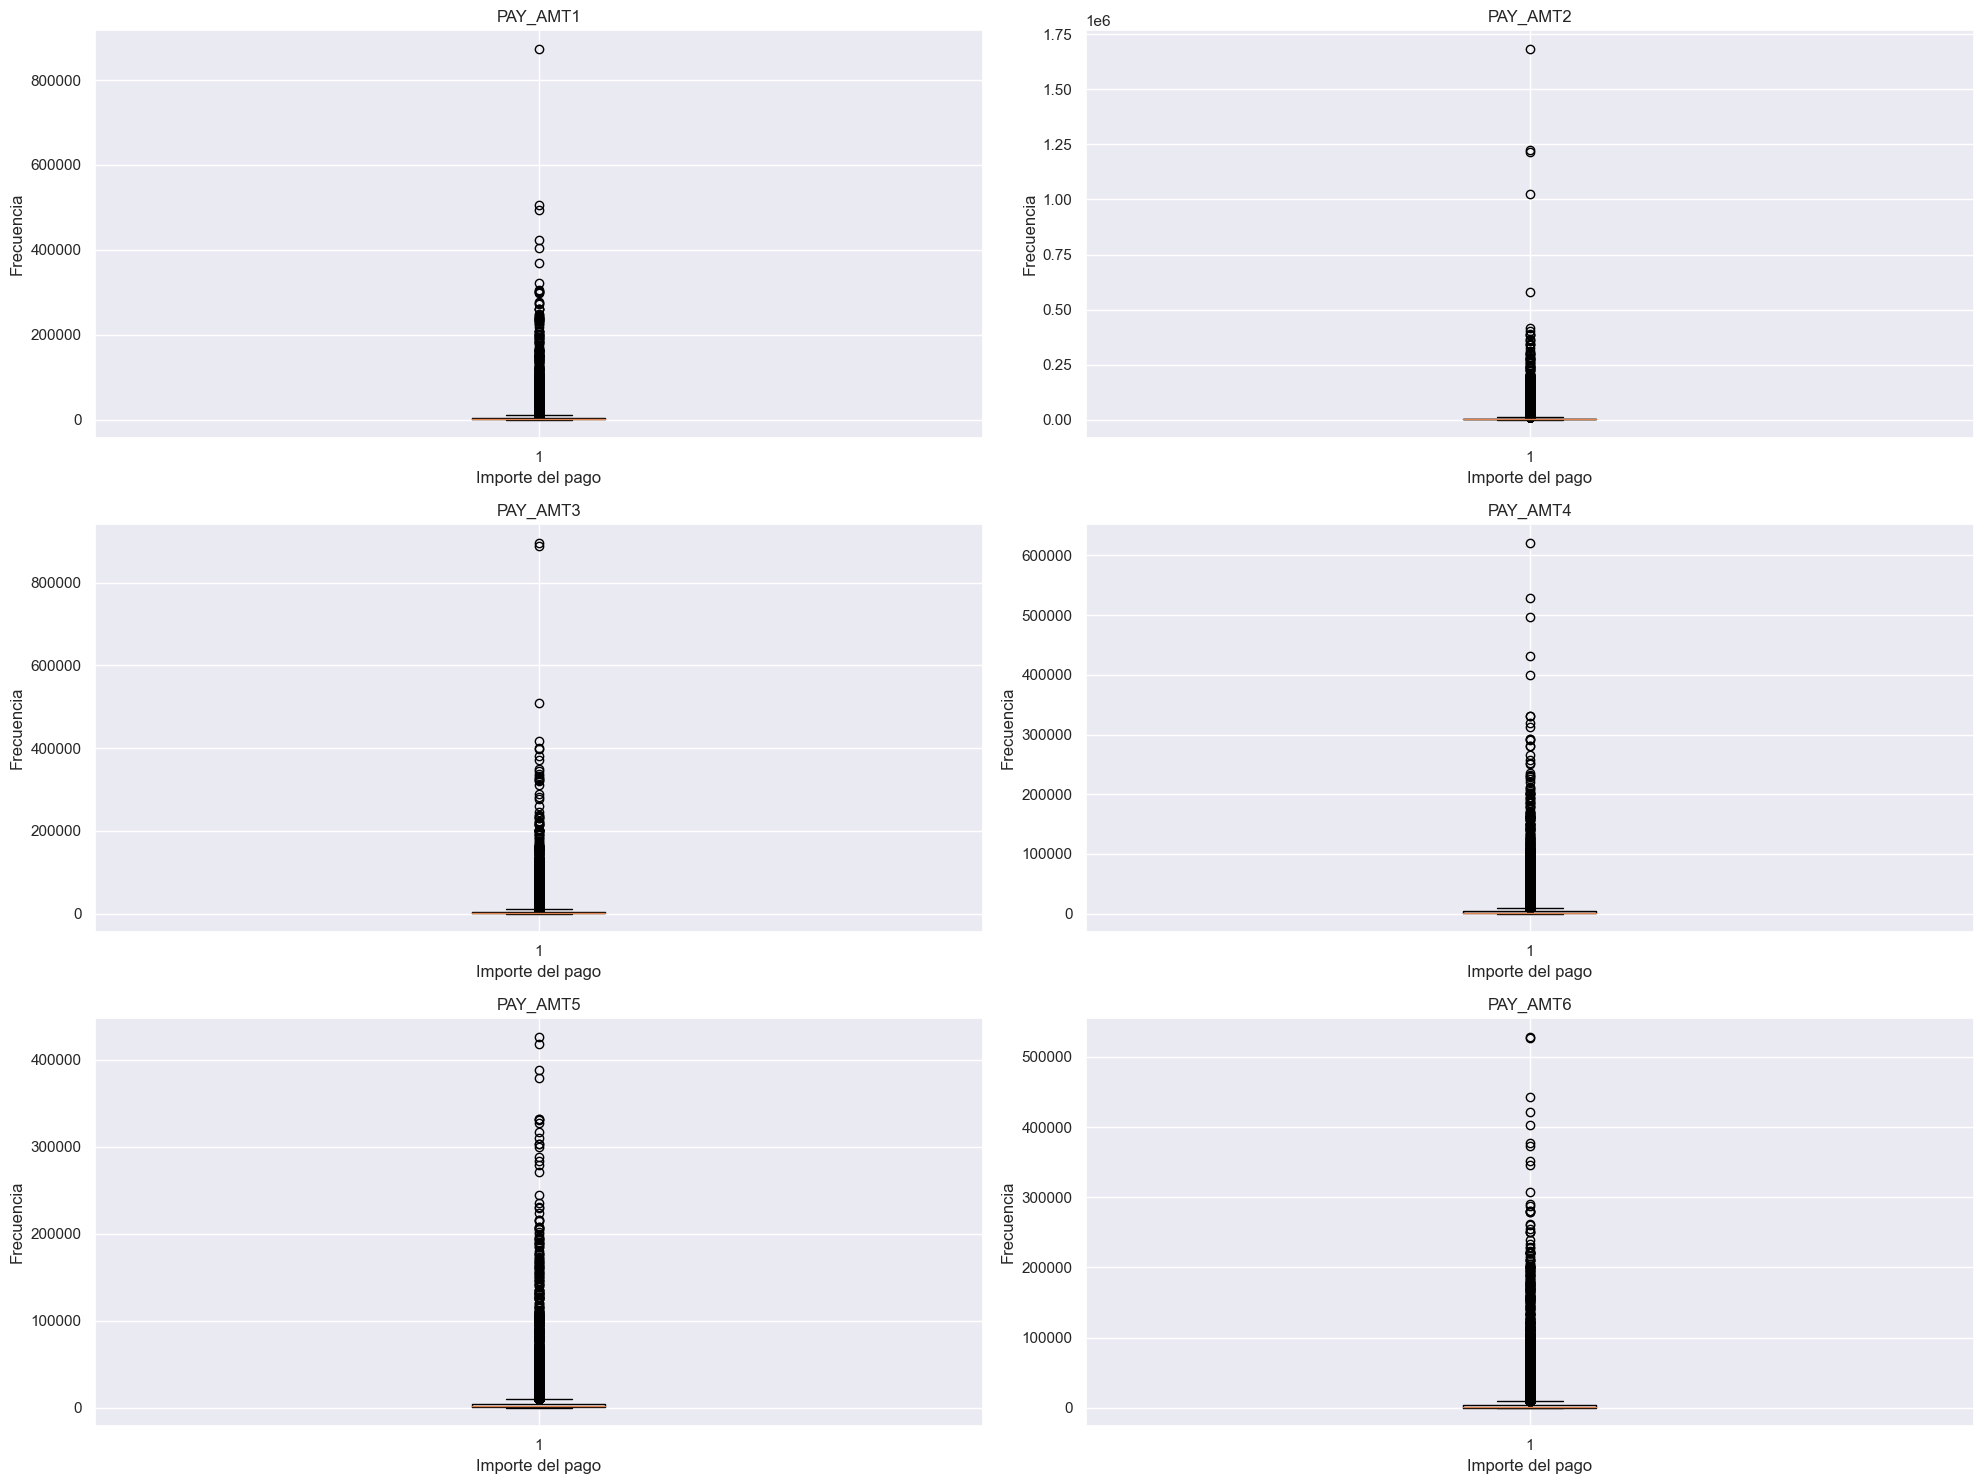

In [44]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# plot time signal:
axs[0, 0].set_title("PAY_AMT1")
axs[0, 0].boxplot(data['PAY_AMT1'])
axs[0, 0].set_xlabel("Importe del pago")
axs[0, 0].set_ylabel("Frecuencia")

axs[0, 1].set_title("PAY_AMT2")
axs[0, 1].boxplot(data['PAY_AMT2'])
axs[0, 1].set_xlabel("Importe del pago")
axs[0, 1].set_ylabel("Frecuencia")

axs[1, 0].set_title("PAY_AMT3")
axs[1, 0].boxplot(data['PAY_AMT3'])
axs[1, 0].set_xlabel("Importe del pago")
axs[1, 0].set_ylabel("Frecuencia")

axs[1, 1].set_title("PAY_AMT4")
axs[1, 1].boxplot(data['PAY_AMT4'])
axs[1, 1].set_xlabel("Importe del pago")
axs[1, 1].set_ylabel("Frecuencia")

axs[2, 0].set_title("PAY_AMT5")
axs[2, 0].boxplot(data['PAY_AMT5'])
axs[2, 0].set_xlabel("Importe del pago")
axs[2, 0].set_ylabel("Frecuencia")

axs[2, 1].set_title("PAY_AMT6")
axs[2, 1].boxplot(data['PAY_AMT6'])
axs[2, 1].set_xlabel("Importe del pago")
axs[2, 1].set_ylabel("Frecuencia")


fig.tight_layout()
plt.show()

El 75% de los montos de importe de pago anterior se encuentra entre los 400 y 500 dólares, los datos que se encuentra sobre estos valores podriamos considerarlos datos atípicos.

In [45]:
#Variable respuesta

data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

<AxesSubplot:title={'center':'Default payment'}>

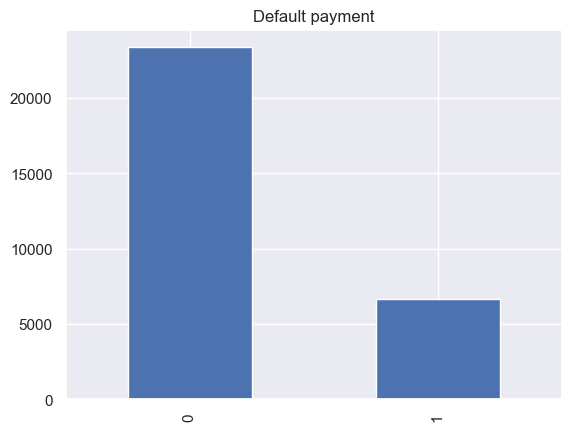

In [46]:
data['default.payment.next.month'].value_counts().plot(kind="bar", title="Default payment")

El 77.8% de los clientes no se encuentran con Default payment.

In [47]:
corr = data.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.024755,-0.219365,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.013691,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219365,0.013691,1.000000,-0.131816,0.175499,0.105193,0.120662,0.113370,0.108355,0.096613,...,-0.002208,-0.009384,-0.010872,-0.038229,-0.029372,-0.039936,-0.038786,-0.042082,-0.039017,0.026969
MARRIAGE,-0.111012,-0.028522,-0.131816,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.175499,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105193,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.120662,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.113370,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108355,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.096613,0.034377,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

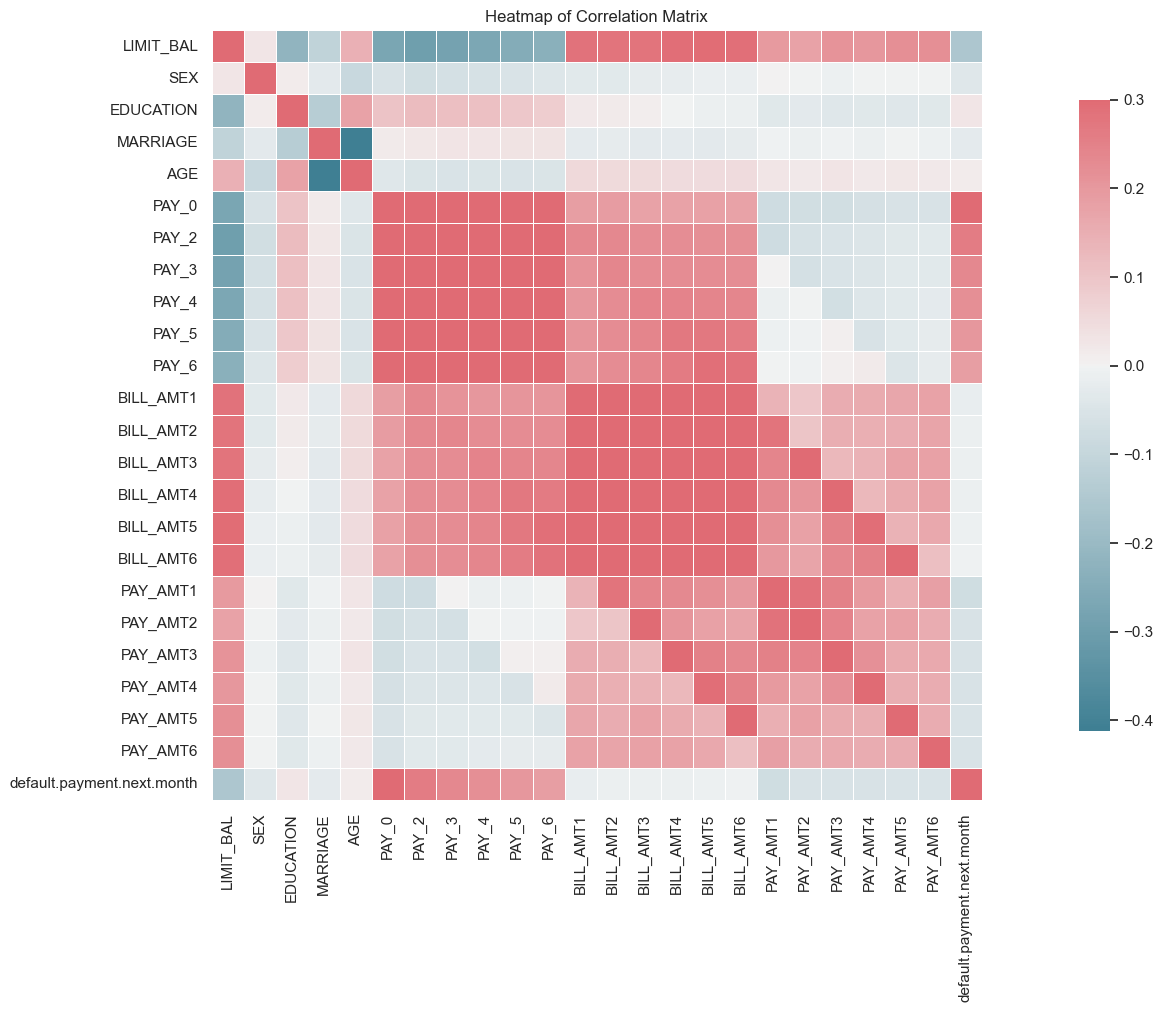

In [48]:
# Heatmap

plt.figure(figsize = (25,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

La variable monto del estado de cuenta (BILL_AMT) es la que tiene una mayor correlación con las variables estado de pago e importe del pago anterior. Mientras que la variable respuesta (default.payment.next.month) presenta la mayor correlación con las variables de estado de pago.
Las variables demorgraficas o de caracteristicas de el cliente no tiene una relación importante con las variables asociados a pagos y montos de estado.

## Procesamiento de datos

Separación de las variables dependientes e independiente.

In [49]:
x=data.drop('default.payment.next.month', 1)
y=data['default.payment.next.month']


In [50]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [51]:
y

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default.payment.next.month, Length: 30000, dtype: int64

Realice la prueba eliminando las variables con menor correlación (como se muestra en le heatmap), para probar los resultados obtenidos sin ellas 'SEX','EDUCATION','MARRIAGE','AGE'. El resultado de los modelos fue similar por lo que preferi dejar el data set completo para laa pruebas finales.
x=x.drop(['SEX','EDUCATION','MARRIAGE','AGE'], axis=1)
x

### Normalización

In [52]:
numeric_columns = x.select_dtypes(include=['float64', 'int64']).columns

columns_to_exclude = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

Se excluyen de la normalización las variables numericas categoricas.

In [53]:
ss = StandardScaler()

x[numeric_columns] = ss.fit_transform(x[numeric_columns])
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
2,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
4,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
5,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,1,3,1,0.381275,0,0,0,0,0,...,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29997,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,...,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29998,-1.059646,1,2,2,0.164303,4,3,2,-1,0,...,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001


### Separación data de entrenamiento y testeo

In [54]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.25,random_state=0)

print("Ejemplos usados para entrenar: ", len(x_train))
print("Ejemplos usados para test: ", len(x_test))

Ejemplos usados para entrenar:  22500
Ejemplos usados para test:  7500


## Entrenamientos de modelos de aprendizaje automatico

### Modelo Regresión logistica

In [55]:
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(solver='lbfgs',
                            max_iter=  100,
                            penalty='l2',
                            class_weight=None,
                            random_state=42)
modelo.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [56]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_) # b0
print("Coeficiente:", list(zip(x.columns, modelo.coef_.flatten(), ))) # b1
print("Accuracy de entrenamiento:", modelo.score(x, y)) # Cuanto datos clasifico correctamente

Intercept: [-0.66815685]
Coeficiente: [('LIMIT_BAL', -0.07735171325273675), ('SEX', -0.1386613608637246), ('EDUCATION', -0.11586097072087088), ('MARRIAGE', -0.19433344371395866), ('AGE', 0.06331808975483934), ('PAY_0', 0.5388485914586078), ('PAY_2', 0.09119068207623375), ('PAY_3', 0.07288447986808255), ('PAY_4', 0.01060244968756986), ('PAY_5', 0.03312115148243186), ('PAY_6', 0.03964601337997031), ('BILL_AMT1', -0.5300383196666718), ('BILL_AMT2', 0.1817960573068922), ('BILL_AMT3', 0.1499922522482167), ('BILL_AMT4', 0.07072465212950003), ('BILL_AMT5', 0.021173606660065142), ('BILL_AMT6', 0.013157409096517114), ('PAY_AMT1', -0.28543014935506217), ('PAY_AMT2', -0.22237182602838507), ('PAY_AMT3', -0.0969262520299359), ('PAY_AMT4', -0.06068656385968818), ('PAY_AMT5', -0.04173205599207259), ('PAY_AMT6', -0.04488759213378673)]
Accuracy de entrenamiento: 0.8100333333333334


In [57]:
accuracy = modelo.score(x, y)
print(f"El accuracy o precisión global de test es: {100 * accuracy} %")

El accuracy o precisión global de test es: 81.00333333333334 %


La precisión del modelo es de un 81%, es decir que predice de forma correcta el 81% de los datos.

In [58]:

predicciones = modelo.predict(X = x_test,)

print("Matriz de confusión")
print("-------------------")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)

Matriz de confusión
-------------------
[[5742  126]
 [1261  371]]


La matriz de confusión nos entrega los casos acertados y no acertados dentro del modelo en la muestra de testeo. Tenemos un total de 7500 registros para realizar la comprobación del modelo, dentro de estos 7003 del grupo 0 y 497 del grupo 1. para el grupo 0 el 82% de los registros en testeo los predice de forma correcta, mientras que solo el 75% son correctamente predechos del grupo 1.

In [59]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [60]:
probs = modelo.predict_proba(x_test) 
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.72


In [61]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  

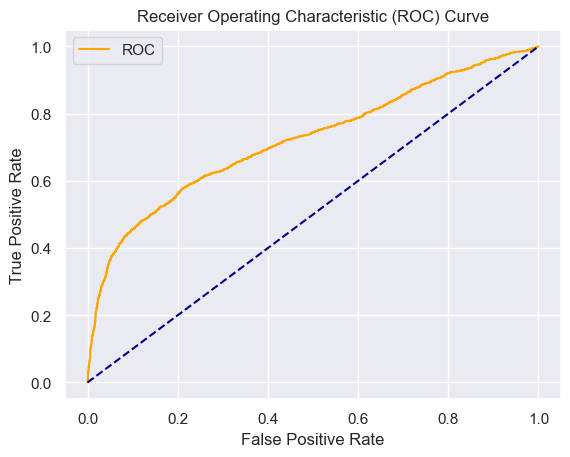

In [62]:
plot_roc_curve(fpr, tpr)  

### Arboles de decisión

In [63]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(x_train, y_train)
dt2_score_train = dt2.score(x_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(x_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.8171555555555555
Testing score:  0.8269333333333333


Para el modelo de arboles de decisiones tenemos una predicción del 82,7%, con una profundidad máxima del arbol de 2 ramas.

#### Optimización de hiperparámetros

Utilizaremos la optimización de hiperparámetros GridSearchCV para determinar el número optimo de profundidad máxima del arbol para obtener una mayor precisión del modelo.

In [64]:
#clf = tree.DecisionTreeClassifier()
param = {'max_depth':[2,4,6,8,10]}

est = GridSearchCV(estimator=dt2, param_grid=param)

est.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
             param_grid={'max_depth': [2, 4, 6, 8, 10]})

In [65]:
est.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=1)

In [66]:
est.best_params_

{'max_depth': 4}

Realizamos la prueba del modelo con la mejor profundidad máxima del arbol obtenida que es de 4 para analizar los resultados y comparar con la ya realizada de 2.

In [67]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt2.fit(x_train, y_train)
dt2_score_train = dt2.score(x_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(x_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.8216444444444444
Testing score:  0.8262666666666667


Los resultados obtenidos no presentan una mayor variación, ya que con una profundidad máxima de 4 tenemos un precisión del 82,6% para la muestra de testeo, mientras con el de 2 como vimos anteriormente es de 82,7%.

In [68]:
# Make predictions on the test set
preds = dt2.predict(x_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(y_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(x_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(y_test, probs)))


Accuracy score: 
0.8262666666666667

Area Under Curve: 
0.7522753435048186


In [69]:
predicciones = dt2.predict(X = x_test,)

print("Matriz de confusión")
print("-------------------")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)

Matriz de confusión
-------------------
[[5611  257]
 [1046  586]]


La matriz de confusión nos entrega los casos acertados y no acertados dentro del modelo en la muestra de testeo. Tenemos un total de 7500 registros para realizar la comprobación del modelo, dentro de estos 6653 del grupo 0 y 825 del grupo 1. para el grupo 0 el 84% de los registros en testeo los predice de forma correcta, mientras que solo el 71% son correctamente predechos del grupo 1.

In [70]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [71]:
probs = dt2.predict_proba(x_test) 
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.75


In [72]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  

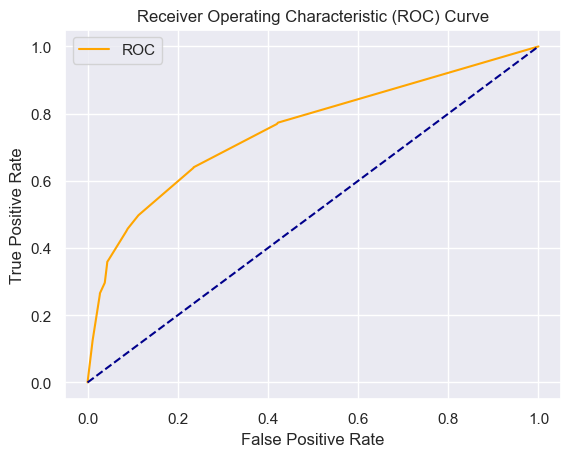

In [73]:
plot_roc_curve(fpr, tpr)  

### Random Forest

In [74]:
RF = RandomForestClassifier(n_estimators=100,
                            random_state=0,
                            max_depth=8)  
RF.fit(x_train, y_train) 
RF_score_train = RF.score(x_train, y_train)
print("Training score: ",RF_score_train)
RF_score_test = RF.score(x_test, y_test)
print("Testing score: ",RF_score_test)

Training score:  0.8361333333333333
Testing score:  0.8237333333333333


Para el modelo Random Forest tenemos una predicción del 82,4%.

In [75]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = RF.predict(X = x_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.41984123983556765


In [76]:
#clf = tree.DecisionTreeClassifier()
param = {'max_depth':[2,4,6,8]}

est = GridSearchCV(estimator=RF, param_grid=param)

est.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=8, random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8]})

In [77]:
est.best_estimator_

RandomForestClassifier(max_depth=8, random_state=0)

In [78]:
est.best_params_

{'max_depth': 8}

In [79]:
# Make predictions on the test set
preds = RF.predict(x_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(y_test, preds)))

# Make predictions on the test set using predict_proba
probs = RF.predict_proba(x_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(y_test, probs)))


Accuracy score: 
0.8237333333333333

Area Under Curve: 
0.7856889560527688


In [80]:
predicciones = RF.predict(X = x_test,)

print("Matriz de confusión")
print("-------------------")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)

Matriz de confusión
-------------------
[[5601  267]
 [1055  577]]


Tenemos un total de 6656 registros para realizar la comprobación del modelo, dentro de estos 6653 del grupo 0 y 844 del grupo 1. para el grupo 0 el 84% de los registros en testeo los predice de forma correcta, mientras que solo el 68% son correctamente predechos del grupo 1.